In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt

In [2]:
glob.glob('*.csv')

['New_books.csv']

## Load data

In [3]:
cleaned_books_df = pd.read_csv('New_books.csv')
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [4]:
cleaned_books_df.describe()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
count,8287,7320,4092,8274,6509,8287
unique,1192,403,1989,8031,4949,8287
top,London,1897,Macmillan & Co.,Poems,William Shakespeare,http://www.flickr.com/photos/britishlibrary/ta...
freq,4219,174,85,10,48,1


## 1. Get the top 5 publishers and their published number.
To understanding Market Dynamics, identifying the top publishers helps understand the publishing market's dynamics during a specific period. It can indicate which publishers were dominant and how the publishing landscape might have been shaped by their activities.

In [5]:
cleaned_books_df['Publisher'].value_counts()

Publisher
Macmillan & Co.      85
London               69
Privately printed    53
Longmans & Co.       52
Hurst & Blackett     51
                     ..
F. Murray             1
J. Davidson & Co.     1
Punch Office          1
J. Cooke, etc.        1
W. Abbatt             1
Name: count, Length: 1989, dtype: int64

In [6]:
n = 5
publisher_list = cleaned_books_df['Publisher'].value_counts()[:n]
publisher_list

Publisher
Macmillan & Co.      85
London               69
Privately printed    53
Longmans & Co.       52
Hurst & Blackett     51
Name: count, dtype: int64

In [7]:
publisher_list.index, publisher_list.to_list()

(Index(['Macmillan & Co.', 'London', 'Privately printed', 'Longmans & Co.',
        'Hurst & Blackett'],
       dtype='object', name='Publisher'),
 [85, 69, 53, 52, 51])

<BarContainer object of 5 artists>

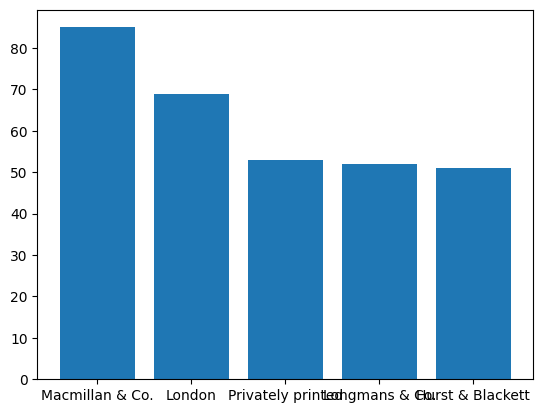

In [8]:
plt.bar(publisher_list.index,publisher_list.to_list())

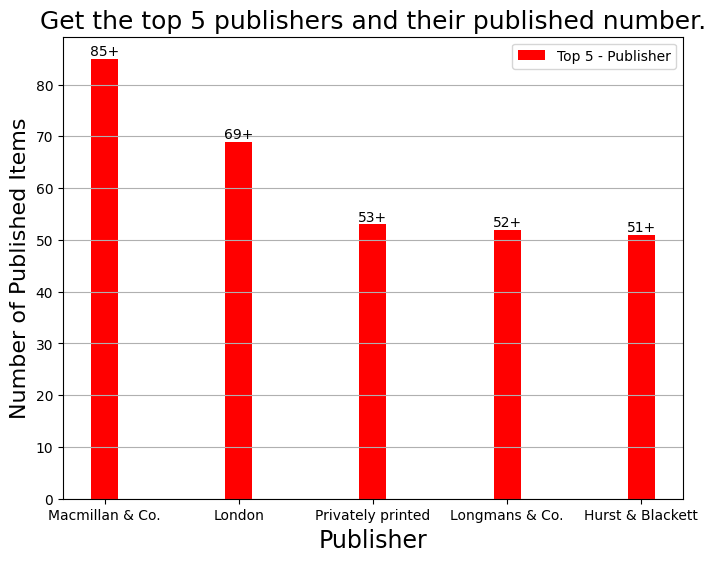

In [9]:
# Creating a bar graph
plt.figure(figsize=(8,6))

#load your data
#Your code:
x_list = publisher_list.index
y_list = publisher_list.to_list()
plt.bar(x_list, y_list, width=0.2, color="red", align = "center", label = "Top 5 - Publisher")
# Annotating each bar with the corresponding most publish number of items
# Your Code:
for i in range(len(y_list)):
    value = y_list[i]
    plt.text(i,value,str(value)+"+",ha='center',va='bottom')
    
plt.legend()
plt.title('Get the top 5 publishers and their published number.',fontsize=18)
plt.xlabel('Publisher',fontsize=17)
plt.ylabel('Number of Published Items',fontsize=16)
plt.grid(axis='y')

plt.show()

## Practice 1
### 1.1 Identify the top five publishers with the greatest number of books published. 
### 1.2 Ascertain the year in which each of these publishers achieved their highest sales, along with the total number of books they published in that particular year.


In [10]:
publisher_list

Publisher
Macmillan & Co.      85
London               69
Privately printed    53
Longmans & Co.       52
Hurst & Blackett     51
Name: count, dtype: int64

In [11]:
# Selecting the data for the chosen publisher "Macmillan & Co."
macdf = cleaned_books_df[cleaned_books_df['Publisher'] == 'Macmillan & Co.']
macdf['Date of Publication'].value_counts()[:1]

Date of Publication
1896    16
Name: count, dtype: int64

In [12]:
dic = {}
for pub in publisher_list.index:
    #print(pub)
    author_books = cleaned_books_df[cleaned_books_df['Publisher'] == pub]
    year_info = author_books['Date of Publication'].value_counts()[:1]
    year = year_info.index[0]
    bookNum = year_info[0]
    dic[pub] = [year, bookNum]
dic

C:\Users\guill\AppData\Local\Temp\ipykernel_16640\2426440296.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bookNum = year_info[0]
C:\Users\guill\AppData\Local\Temp\ipykernel_16640\2426440296.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bookNum = year_info[0]
C:\Users\guill\AppData\Local\Temp\ipykernel_16640\2426440296.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bookNum = year_info[0]
C:\Users\guill\AppData\Local

{'Macmillan & Co.': ['1896', np.int64(16)],
 'London': ['1866', np.int64(3)],
 'Privately printed': ['1880', np.int64(3)],
 'Longmans & Co.': ['1889', np.int64(6)],
 'Hurst & Blackett': ['1856', np.int64(3)]}

C:\Users\guill\AppData\Local\Temp\ipykernel_16640\4293750285.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


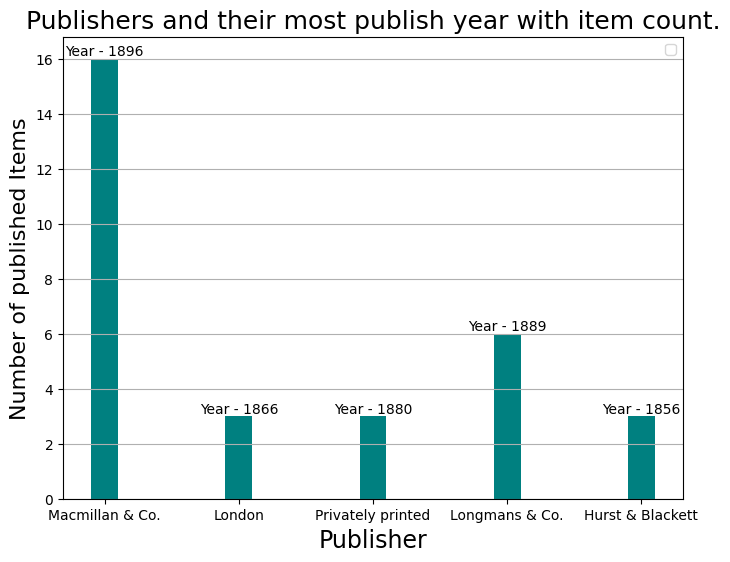

In [13]:
publisher_name = list(dic.keys())
most_publish_year = [dic[publisher][0] for publisher in dic]
publish_item = [dic[publisher][1] for publisher in dic]
# Creating a bar graph
plt.figure(figsize=(8,6))

#Your code:
x_list = publisher_name
y_list = publish_item
plt.bar(x_list, y_list, width=0.2, color="teal", align ="center")

# Annotating each bar with the corresponding most publish number of items
# Your code:
for i in range(len(publish_item)):

    year = most_publish_year[i]
    x_posi = i
    y_posi = publish_item[i]
    textvalue = "Year - "+year
    plt.text(x_posi,y_posi,textvalue, ha='center',va='bottom')

plt.legend()
plt.title('Publishers and their most publish year with item count.',fontsize=18)
plt.xlabel('Publisher', fontsize=17)
plt.ylabel('Number of published Items',fontsize=16)
plt.grid(axis='y')

    
plt.show()



## 2. Get the 5 most published place
Reason: For contemporary publishers, marketers, and authors, understanding historical publishing centers can provide insights into established markets and potential opportunities for new ventures or expansions.

In [14]:
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [15]:
cleaned_books_df.describe()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
count,8287,7320,4092,8274,6509,8287
unique,1192,403,1989,8031,4949,8287
top,London,1897,Macmillan & Co.,Poems,William Shakespeare,http://www.flickr.com/photos/britishlibrary/ta...
freq,4219,174,85,10,48,1


In [16]:
n = 5
publisher_place_list = cleaned_books_df['Place of Publication'].value_counts()[:n]
publisher_place_list

Place of Publication
London       4219
Paris         479
Edinburgh     208
New York      177
Leipzig       119
Name: count, dtype: int64

In [17]:
others_place_number = cleaned_books_df['Place of Publication'].value_counts()[5:].sum()
others_place_number

np.int64(3085)

In [18]:
#create publish_place_data
def get_publish_place_data(n,df):
    #n: Number of target searches
    #df: input dataframe
    # Your code:
    publisher_place_list = cleaned_books_df['Place of Publication'].value_counts()[:n]
    others_place_number = cleaned_books_df['Place of Publication'].value_counts()[n:].sum()

    dic = {}
    for pub, item in zip(publisher_place_list.index,publisher_place_list):
        dic[pub] = item
    dic["Others"] = others_place_number

    
    return dic
    
get_publish_place_data(5,cleaned_books_df)

{'London': 4219,
 'Paris': 479,
 'Edinburgh': 208,
 'New York': 177,
 'Leipzig': 119,
 'Others': np.int64(3085)}

['London', 'Paris', 'Edinburgh', 'New York', 'Leipzig', 'Others']
[4219, 479, 208, 177, 119, np.int64(3085)]


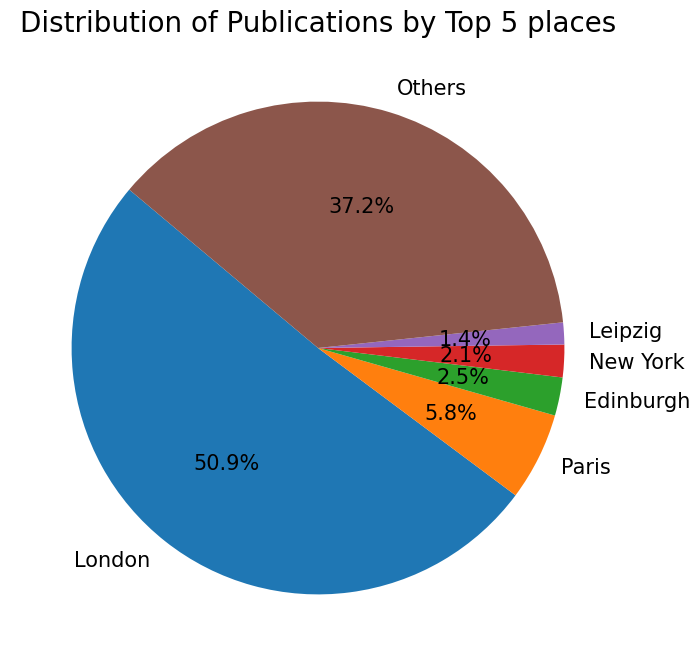

In [19]:
# Pie Chart Analysis: 

# Sample data provided earlier (assuming the same structure as the actual dataset)
place_of_data = get_publish_place_data(5,cleaned_books_df)

# Extracting data for pie chart
places = list(place_of_data.keys())
publications = [place_of_data[place] for place in places]
print(places)
print(publications)


# Creating a pie chart
plt.figure(figsize = (8,8))
# Your Pie chart code:
plt.pie(publications, labels = places, autopct="%1.1f%%", startangle=140, textprops={'fontsize': 15})

plt.title('Distribution of Publications by Top 5 places', fontsize =20)
plt.show()



### 3.1 Demo for  `.groupby`  function

In [20]:
# Sample DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'B'],
                   'Values': [10, 20, 30, 40]})

df

,Category,Values
0,A,10
1,B,20
2,A,30
3,B,40


In [21]:
# Grouping by 'Category' and calculating the size of each group
grouped = df.groupby('Category').size()

print(grouped)

Category
A    2
B    2
dtype: int64


In [22]:
# Grouping by 'Category' and calculating the mean of each group
grouped = df.groupby('Category').sum()

print(grouped)

          Values
Category        
A             40
B             60


## 3. Show the yearly trend in the number of publications

### 3.2 Use `.groupby` on Books data

In [23]:
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [24]:
cleaned_books_df['Date of Publication']

0       1879 
1        1868
2        1869
3        1851
4        1857
        ...  
8282     1838
8283     1831
8284      NaN
8285     1834
8286     1834
Name: Date of Publication, Length: 8287, dtype: object

In [25]:
yearly_publication_counts = cleaned_books_df.groupby('Date of Publication').size()
yearly_publication_counts

Date of Publication
112. G. & W. B. Whittaker    1
1510?]                       1
1540                         1
1570                         1
1592                         1
                            ..
1900]                        1
1911.                        1
1915                         1
MDCCCC.                      1
c.1825]                      1
Length: 403, dtype: int64

In [26]:
for i in yearly_publication_counts.index:
    print(i,type(i))

112. G. & W. B. Whittaker <class 'str'>
1510?] <class 'str'>
1540 <class 'str'>
1570  <class 'str'>
1592 <class 'str'>
1602 <class 'str'>
1607 <class 'str'>
1625 <class 'str'>
1628 <class 'str'>
1631 <class 'str'>
1632 <class 'str'>
1633 <class 'str'>
1635 <class 'str'>
1637 <class 'str'>
1638 <class 'str'>
1639 <class 'str'>
1640 <class 'str'>
1641 <class 'str'>
1641?] <class 'str'>
1647 <class 'str'>
1647?] <class 'str'>
1648 <class 'str'>
1651 <class 'str'>
1653 <class 'str'>
1654 <class 'str'>
1654  <class 'str'>
1656 <class 'str'>
1656.  <class 'str'>
1657 <class 'str'>
1658 <class 'str'>
1660 <class 'str'>
1661 <class 'str'>
1662 <class 'str'>
1663 <class 'str'>
1664 <class 'str'>
1667 <class 'str'>
1670 <class 'str'>
1671 <class 'str'>
1672 <class 'str'>
1673 <class 'str'>
1674 <class 'str'>
1675 <class 'str'>
1676 <class 'str'>
1677 <class 'str'>
1678 <class 'str'>
1678?] <class 'str'>
1679 <class 'str'>
1680 <class 'str'>
1681 <class 'str'>
1682 <class 'str'>
1683 <class 'str'

In [27]:
def clean_year(year):
    
    if year == 'nan':
        return '0'
    if year[0]!='1':
        year=year[year.find('1'):]
    if ' ' in year:
        year=year[:year.find(' ')]
    if '/' in year:
        year=year[:year.find('/')]
    if '?' in year:
        year = year[:year.find('?')]
    if ']' in year:
        year = year[:year.find(']')]
    if '.' in year:
        year = year[:year.find('.')]

    if year.isdigit():
        year = int(year)
    else:
        year = 30

    return year

cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].astype(str)
cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].apply(clean_year)
cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].astype(int)
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


### Get line plot 

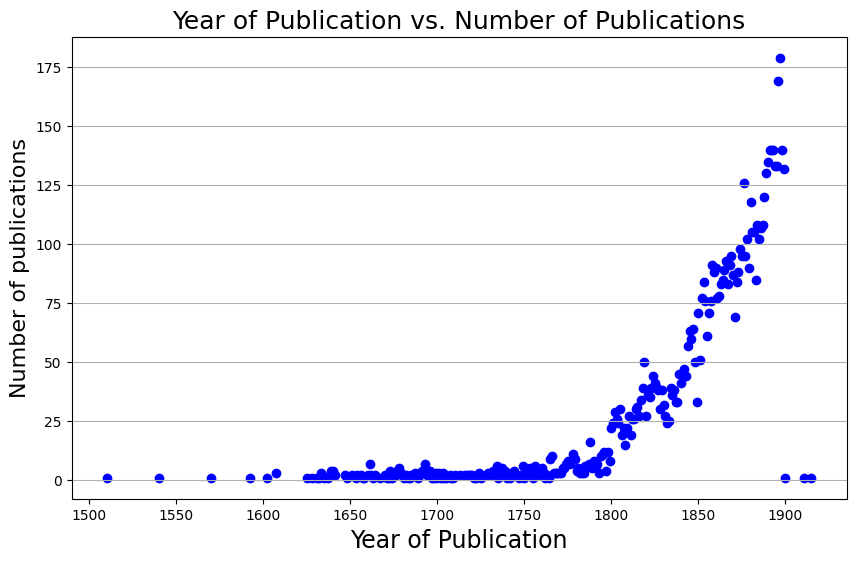

In [28]:
# Scatter Plot Analysis: Year of Publication vs. Number of Publications

# Grouping the data by 'Date of Publication' to count the number of publications each year
testdata = cleaned_books_df[cleaned_books_df['Date of Publication']>1000]
yearly_Publication_count = testdata.groupby('Date of Publication').size()

# Sorting the data by year (index of the grouped data)
sorted_years = yearly_Publication_count.sort_index()

# Creating a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(sorted_years.index,sorted_years,color='blue')


plt.title('Year of Publication vs. Number of Publications',fontsize=18)
plt.xlabel('Year of Publication',fontsize=17)
plt.ylabel('Number of publications',fontsize=16)
plt.grid(axis='y')

plt.show()

# A line graph to show the yearly trend in the number of publications.

## Practice 2
### Identify the top five publishers with their publicated books during 1800 - 1900. (line graph)


In [29]:
publish_list = cleaned_books_df['Publisher'].value_counts()[:5]
publish_list

Publisher
Macmillan & Co.      85
London               69
Privately printed    53
Longmans & Co.       52
Hurst & Blackett     51
Name: count, dtype: int64

In [30]:
dfA = cleaned_books_df[cleaned_books_df['Publisher'] ==publish_list.index[0]]
filerdf = dfA[(dfA['Date of Publication']>=1800) & (dfA['Date of Publication']<=1900)]
yearly_counts = filerdf.groupby('Date of Publication').size()

yearly_counts.sort_index()

Date of Publication
1857     1
1859     1
1862     1
1864     1
1869     1
1870     1
1873     1
1874     2
1875     1
1876     1
1880     3
1881     1
1882     2
1883     1
1884     4
1885     2
1886     4
1887     2
1888     1
1889     2
1890     3
1891     1
1892     1
1893     5
1894     2
1895     8
1896    16
1897     6
1898     7
1899     3
dtype: int64

In [31]:
def filter_topX_publisher_in_1800_1900(n,df):
    #n: Number of target searches
    #df: input dataframe
    #Your code:
    dic_res = {}
    publish_list = cleaned_books_df['Publisher'].value_counts()[:5]
    for publisher in publish_list.index:
        dfA = cleaned_books_df[cleaned_books_df['Publisher'] ==publisher]
        filerdf = dfA[(dfA['Date of Publication']>=1800) & (dfA['Date of Publication']<=1900)]
        yearly_counts = filerdf.groupby('Date of Publication').size()

        sorted_years = yearly_counts.sort_index()

        dic_res[publisher] = sorted_years
    
    return dic_res

filter_topX_publisher_in_1800_1900(5,cleaned_books_df)

{'Macmillan & Co.': Date of Publication
 1857     1
 1859     1
 1862     1
 1864     1
 1869     1
 1870     1
 1873     1
 1874     2
 1875     1
 1876     1
 1880     3
 1881     1
 1882     2
 1883     1
 1884     4
 1885     2
 1886     4
 1887     2
 1888     1
 1889     2
 1890     3
 1891     1
 1892     1
 1893     5
 1894     2
 1895     8
 1896    16
 1897     6
 1898     7
 1899     3
 dtype: int64,
 'London': Date of Publication
 1802    1
 1803    1
 1805    1
 1806    2
 1807    1
 1819    1
 1820    1
 1845    1
 1846    1
 1848    1
 1850    1
 1853    1
 1854    1
 1858    1
 1862    1
 1865    2
 1866    3
 1867    1
 1869    1
 1871    1
 1872    1
 1875    1
 1880    1
 1885    1
 1886    1
 1888    2
 1889    1
 1890    2
 1891    1
 1892    1
 1895    1
 1896    2
 1897    2
 1898    3
 dtype: int64,
 'Privately printed': Date of Publication
 1800    1
 1804    1
 1806    1
 1807    1
 1823    1
 1829    1
 1830    2
 1835    1
 1836    1
 1837    2
 1843    1
 1

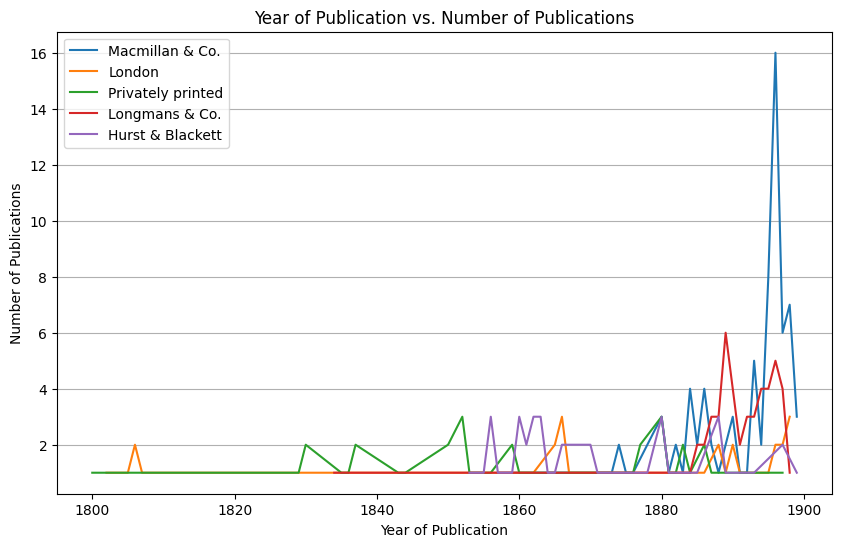

In [32]:
# Extracting publishers, publish years, and publish items
publisher_data_dic = filter_topX_publisher_in_1800_1900(5,cleaned_books_df)

# Creating a line graph
plt.figure(figsize=(10, 6))

for pub,years_data in publisher_data_dic.items():
#     print(pub,years_data)
    plt.plot(years_data.index, years_data, '-', label=pub)

# plt.plot(yearly_publication_counts.index, yearly_publication_counts, color='blue')
plt.title('Year of Publication vs. Number of Publications')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Publications')
# plt.xticks([1500,1550,1600,1650,1700,1750,1800,1850,1900],
#            ['1890','1891','1892','1893','1894','1895','1896','1897','1898',],fontsize = 15)
plt.legend()
plt.grid(axis='y')
plt.show()

### Compute the cumulative sum of Publications. (Please watch the tutorial)

In [33]:
a = np.array([1,2,3,4,5])
np.cumsum(a)

array([ 1,  3,  6, 10, 15])

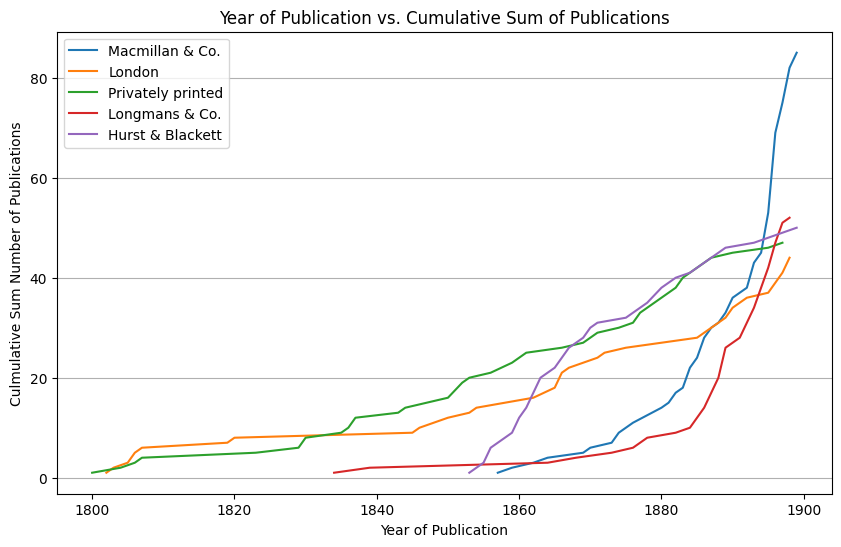

In [34]:
# Extracting publishers, publish years, and publish items
publisher_data_dic = filter_topX_publisher_in_1800_1900(5,cleaned_books_df)

# Creating a line graph
plt.figure(figsize=(10, 6))

for pub,years_data in publisher_data_dic.items():
#     print(pub,years_data)
    years_data = np.cumsum(years_data)
    plt.plot(years_data.index, years_data, '-', label=pub)

# plt.plot(yearly_publication_counts.index, yearly_publication_counts, color='blue')
plt.title('Year of Publication vs. Cumulative Sum of Publications')
plt.xlabel('Year of Publication')
plt.ylabel('Culmulative Sum Number of Publications')
# plt.xticks([1500,1550,1600,1650,1700,1750,1800,1850,1900],
#            ['1890','1891','1892','1893','1894','1895','1896','1897','1898',],fontsize = 15)
plt.legend()
plt.grid(axis='y')
plt.show()